# Setup

In [1]:
! pip install nerpy
# ! pip install --upgrade pyarrow

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
import json
from transformers import AutoModelForTokenClassification, AutoTokenizer, pipeline
import nerpy

In [3]:
# Load the file
orig_df = pd.read_csv('/content/model_eval_62.csv', header=None)
answer_df = pd.read_csv('/content/answer_62.csv', header=None)

# Verify the number of rows
print(orig_df.shape)
print(answer_df.shape)

(62, 1)
(62, 1)


In [4]:
# Extract ground truth entities
ground_truth_entities = answer_df.iloc[:, 0].tolist()

# Extract sentences from the DataFrame
sentences = orig_df.iloc[:, 0].tolist()


# Model Evaluation

## shibing624/bert4ner-base-chinese

In [5]:
from nerpy import NERModel

# Verify lengths match
if len(ground_truth_entities) != len(sentences):
    raise ValueError("Mismatch between the number of ground truth entities and sentences.")

# Load the Model
model = NERModel("bert", "shibing624/bert4ner-base-chinese")

# Predict entities for each sentence
predictions, raw_outputs, entities = model.predict(sentences, split_on_space=False)

# Display the predictions
for sentence, entity in zip(sentences, entities):
    print(f"Sentence: {sentence}")
    print(f"Entities: {entity}\n")


2024-08-06 18:39:47.195 | DEBUG    | nerpy.ner_model:__init__:294 - Using labels list: ['I-ORG', 'B-LOC', 'O', 'B-ORG', 'I-LOC', 'I-PER', 'B-TIME', 'I-TIME', 'B-PER']
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
2024-08-06 18:39:47.958 | DEBUG    | nerpy.ner_model:__init__:333 - Device: cpu
2024-08-06 18:39:48.681 | INFO     | nerpy.ner_model:load_and_cache_examples:1795 -  Converting to features started.


  0%|          | 0/62 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/8 [00:00<?, ?it/s]

Sentence: 伯和見過
Entities: [('伯和', 'PER')]

Sentence: 別宇文丈
Entities: [('宇文丈', 'PER')]

Sentence: 君章見過
Entities: [('君章', 'PER')]

Sentence: 寄歐陽公
Entities: [('歐陽公', 'PER')]

Sentence: 挽何見山
Entities: []

Sentence: 有懷安國
Entities: [('懷安國', 'PER')]

Sentence: 襄陽懷古
Entities: [('襄陽', 'LOC')]

Sentence: 見放翁退
Entities: []

Sentence: 見蔡儒效
Entities: [('蔡儒效', 'PER')]

Sentence: 見袁蒙齋
Entities: [('袁蒙齋', 'PER')]

Sentence: 送丁惠安
Entities: [('丁惠安', 'PER')]

Sentence: 送仙居令
Entities: []

Sentence: 送歐陽辯
Entities: [('歐陽辯', 'PER')]

Sentence: 送潘華陽
Entities: [('潘華陽', 'PER')]

Sentence: 送鞠彭山
Entities: [('鞠彭山', 'PER')]

Sentence: 錢塘懷古
Entities: [('錢塘', 'LOC')]

Sentence: 題仙居閣
Entities: [('仙居', 'LOC')]

Sentence: 題昌國院
Entities: [('題昌國', 'PER')]

Sentence: 仁壽堂古梅
Entities: []

Sentence: 代壽德興尹
Entities: [('代壽德', 'PER'), ('興尹', 'PER')]

Sentence: 别宇文季蒙
Entities: [('别宇文', 'PER'), ('季蒙', 'PER')]

Sentence: 呈歐陽伯威
Entities: [('歐陽伯威', 'PER')]

Sentence: 呈水心先生
Entities: [('呈水心', 'PER')]

Sentence: 和南仲見寄
Entities: [('南仲見寄', 

In [6]:
# Extract the 'PER' entities from the predictions
predicted_per_entities = []
for entity_list in entities:
    per_entities = [entity[0] for entity in entity_list if entity[1] == 'PER']
    predicted_per_entities.append(per_entities)

# Ensure consistent lengths by handling missing predictions and normalize the ground truth
flattened_answer_list = []
flattened_predictions_shibing624 = []

for idx, (answer, predicted) in enumerate(zip(ground_truth_entities, predicted_per_entities)):
    # Replace 'x' with a space in the ground truth for comparison
    normalized_answer = answer.replace('x', ' ')
    flattened_answer_list.append(normalized_answer)
    if predicted:
        flattened_predictions_shibing624.append(predicted[0].strip())
    else:
        flattened_predictions_shibing624.append('')


# Print ground truth and predicted entities side by side for debugging in a table format
results_df = pd.DataFrame({
    "Answer": flattened_answer_list,
    "Predicted": flattened_predictions_shibing624})

# Display all rows in the DataFrame
pd.set_option('display.max_rows', None)
print(results_df)

   Answer Predicted
0      伯和        伯和
1      宇文       宇文丈
2      君章        君章
3     歐陽公       歐陽公
4     何見山          
5      安國       懷安國
6                  
7      放翁          
8     蔡儒效       蔡儒效
9     袁蒙齋       袁蒙齋
10    丁惠安       丁惠安
11                 
12    歐陽辯       歐陽辯
13    潘華陽       潘華陽
14    鞠彭山       鞠彭山
15                 
16                 
17              題昌國
18                 
19              代壽德
20   宇文季蒙       别宇文
21   歐陽伯威      歐陽伯威
22     水心       呈水心
23     南仲      南仲見寄
24     叔奇        叔奇
25     君時          
26     堯夫        堯夫
27     子召        和子
28     子華       和子華
29     尹叔        尹叔
30     常父        常父
31     平叔          
32     東美       東美見
33     毅伯        毅伯
34     澹庵      澹庵見留
35     耿憲        耿憲
36     太和          
37   宇文公南       宇文公
38   宇文成州        宇文
39   歐陽元老        歐陽
40   歐陽叔弼      歐陽叔弼
41   歐陽振仲      歐陽振仲
42    顔長道          
43                 
44     道可         弔
45    張以道       張以道
46                 
47              彭山贈
48                 


### See Accuracy

In [7]:
# Calculate the accuracy with the condition that spaces are considered correct
correct_predictions = 0
total_predictions = len(flattened_answer_list)

for ans, pred in zip(flattened_answer_list, flattened_predictions_shibing624):
    if ans == pred or (ans == ' ' and pred == ''):
        correct_predictions += 1

shibing624_accuracy = correct_predictions / total_predictions

print(f"Accuracy for this model is: {shibing624_accuracy*100:.3f} %")

Accuracy for this model is: 53.226 %


In [8]:
# Count correct predictions
shibing624_count_correct = 0
for ans, pred in zip(flattened_answer_list, flattened_predictions_shibing624):
    if ans == pred or (ans == ' ' and pred == ''):
        shibing624_count_correct += 1

print(f"Number of correctly predicted entities for shibing624: {shibing624_count_correct}")


Number of correctly predicted entities for shibing624: 33


## uer/roberta-base-finetuned-cluener2020-chinese

In [9]:
from transformers import AutoModelForTokenClassification, AutoTokenizer, pipeline

model = AutoModelForTokenClassification.from_pretrained('uer/roberta-base-finetuned-cluener2020-chinese')
tokenizer = AutoTokenizer.from_pretrained('uer/roberta-base-finetuned-cluener2020-chinese')
ner = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")


In [10]:
# Function to combine contiguous characters into full entity names
def combine_entities(entities):
    combined_entities = []
    current_entity = ""
    for entity in entities:
        if entity['entity_group'] == 'name':
            current_entity += entity['word'].replace(" ", "")  # Remove spaces within entity words
        else:
            if current_entity:
                combined_entities.append(current_entity)
                current_entity = ""
    if current_entity:
        combined_entities.append(current_entity)
    return combined_entities

# Predict entities for each sentence
predicted_per_entities = []
for sentence in sentences:
    entities = ner(sentence)
    combined_per_entities = combine_entities(entities)
    predicted_per_entities.append(combined_per_entities)

# Normalize and flatten predictions
flattened_answer_list = []
flattened_predictions_uer = []

for answer, predicted in zip(ground_truth_entities, predicted_per_entities):
    # Replace 'x' with a space in the ground truth for comparison
    normalized_answer = answer.replace('x', ' ')
    flattened_answer_list.append(normalized_answer)
    if predicted:
        flattened_predictions_uer.append(''.join(predicted).strip())  # Join predicted entities to form a single string
    else:
        flattened_predictions_uer.append('')

# Print ground truth and predicted entities side by side for debugging in a table format
results_df = pd.DataFrame({
    "Answer": flattened_answer_list,
    "Predicted": flattened_predictions_uer
})

# Display all rows in the DataFrame
pd.set_option('display.max_rows', None)
print(results_df)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


   Answer Predicted
0      伯和          
1      宇文         文
2      君章          
3     歐陽公          
4     何見山          
5      安國          
6                  
7      放翁          
8     蔡儒效       蔡儒效
9     袁蒙齋         蒙
10    丁惠安       丁惠安
11                 
12    歐陽辯       歐陽辯
13    潘華陽       潘華陽
14    鞠彭山        彭山
15                 
16                 
17                 
18                 
19              代壽德
20   宇文季蒙     别宇文季蒙
21   歐陽伯威      歐陽伯威
22     水心       呈水心
23     南仲          
24     叔奇          
25     君時          
26     堯夫          
27     子召          
28     子華         華
29     尹叔          
30     常父          
31     平叔          
32     東美          
33     毅伯         毅
34     澹庵          
35     耿憲        耿憲
36     太和          
37   宇文公南        宇文
38   宇文成州        宇文
39   歐陽元老        歐陽
40   歐陽叔弼      歐陽叔弼
41   歐陽振仲      歐陽振仲
42    顔長道          
43                 
44     道可     弔宇文道可
45    張以道       張以道
46                 
47                山
48                 


### See Accuracy


In [11]:
# Calculate the accuracy with the condition that spaces are considered correct
correct_predictions = 0
total_predictions = len(flattened_answer_list)

for ans, pred in zip(flattened_answer_list, flattened_predictions_uer):
    if ans == pred or (ans == ' ' and pred == ''):
        correct_predictions += 1

uer_accuracy = correct_predictions / total_predictions

# Print accuracy with three decimal places
print(f"Accuracy for this model is: {uer_accuracy*100:.3f} %")

Accuracy for this model is: 35.484 %


In [12]:
# Count correct predictions
uer_count_correct = 0
for ans, pred in zip(flattened_answer_list, flattened_predictions_uer):
    if ans == pred or (ans == ' ' and pred == ''):
        uer_count_correct += 1

print(f"Number of correctly predicted entities for uer: {uer_count_correct}")


Number of correctly predicted entities for uer: 22


## ckiplab/bert-base-chinese-ws

In [13]:
from transformers import (
   BertTokenizerFast,
   AutoModelForMaskedLM,
   AutoModelForCausalLM,
   AutoModelForTokenClassification,
)

# nlp task model
tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
model = AutoModelForTokenClassification.from_pretrained('ckiplab/bert-base-chinese-ner')

In [14]:
! pip install -U ckip-transformers

from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

# Initialize drivers
ner_driver = CkipNerChunker(model="bert-base")

In [15]:

# Run NER on each sentence individually and collect results
ner_results = ner_driver(sentences, use_delim=False)

# Print NER results for debugging
for sentence, entities in zip(sentences, ner_results):
    print(f"Sentence: {sentence}")
    for entity in entities:
        print(f"Entity: {entity}")
    print()

# Extract the 'PERSON' entities from the predictions
predicted_per_entities = []
for entities in ner_results:
    per_entities = [entity.word for entity in entities if entity.ner == 'PERSON']
    predicted_per_entities.append(per_entities)

# Normalize and flatten predictions
flattened_answer_list = []
flattened_predictions_ckiplab = []

for idx, (answer, predicted) in enumerate(zip(ground_truth_entities, predicted_per_entities)):
    # Replace 'x' with a space in the ground truth for comparison
    normalized_answer = answer.replace('x', ' ')
    flattened_answer_list.append(normalized_answer)
    if predicted:
        flattened_predictions_ckiplab.append(''.join(predicted).strip())
    else:
        flattened_predictions_ckiplab.append('')

# Print ground truth and predicted entities side by side for debugging in a table format
results_df = pd.DataFrame({
    "Answer": flattened_answer_list,
    "Predicted": flattened_predictions_ckiplab
})

# Display all rows in the DataFrame
pd.set_option('display.max_rows', None)
print(results_df)

Inference: 100%|██████████| 1/1 [00:05<00:00,  5.34s/it]

Sentence: 伯和見過

Sentence: 別宇文丈
Entity: NerToken(word='別宇文丈', ner='PERSON', idx=(0, 4))

Sentence: 君章見過

Sentence: 寄歐陽公
Entity: NerToken(word='歐陽', ner='PERSON', idx=(1, 3))

Sentence: 挽何見山

Sentence: 有懷安國
Entity: NerToken(word='懷安國', ner='PERSON', idx=(1, 4))

Sentence: 襄陽懷古
Entity: NerToken(word='襄陽', ner='GPE', idx=(0, 2))

Sentence: 見放翁退

Sentence: 見蔡儒效
Entity: NerToken(word='蔡儒效', ner='PERSON', idx=(1, 4))

Sentence: 見袁蒙齋
Entity: NerToken(word='袁蒙齋', ner='PERSON', idx=(1, 4))

Sentence: 送丁惠安
Entity: NerToken(word='丁惠安', ner='PERSON', idx=(1, 4))

Sentence: 送仙居令

Sentence: 送歐陽辯
Entity: NerToken(word='歐陽', ner='PERSON', idx=(1, 3))

Sentence: 送潘華陽
Entity: NerToken(word='潘華陽', ner='PERSON', idx=(1, 4))

Sentence: 送鞠彭山
Entity: NerToken(word='彭山', ner='PERSON', idx=(2, 4))

Sentence: 錢塘懷古

Sentence: 題仙居閣

Sentence: 題昌國院
Entity: NerToken(word='昌國院', ner='ORG', idx=(1, 4))

Sentence: 仁壽堂古梅
Entity: NerToken(word='仁壽堂', ner='FAC', idx=(0, 3))
Entity: NerToken(word='古梅', ner='PERSON', idx=(3

### See Accuracy

In [16]:

# Calculate the accuracy with the condition that spaces are considered correct
correct_predictions = 0
total_predictions = len(flattened_answer_list)

for ans, pred in zip(flattened_answer_list, flattened_predictions_ckiplab):
    if ans == pred or (ans == ' ' and pred == ''):
        correct_predictions += 1

ckiplab_accuracy = correct_predictions / total_predictions

# Print accuracy with three decimal places
print(f"Accuracy for this model is: {ckiplab_accuracy*100:.3f} %")

Accuracy for this model is: 43.548 %


In [17]:
# Count correct predictions
ckiplab_count_correct = 0
for ans, pred in zip(flattened_answer_list, flattened_predictions_ckiplab):
    if ans == pred or (ans == ' ' and pred == ''):
        ckiplab_count_correct += 1

print(f"Number of correctly predicted entities for uer: {ckiplab_count_correct}")


Number of correctly predicted entities for uer: 27


## 51la5/roberta-large-NER

In [18]:
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-large-finetuned-conll03-english")
model = AutoModelForTokenClassification.from_pretrained("xlm-roberta-large-finetuned-conll03-english")
classifier = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")


Some weights of the model checkpoint at xlm-roberta-large-finetuned-conll03-english were not used when initializing XLMRobertaForTokenClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
# Predict entities for each sentence
predicted_per_entities = []
for sentence in sentences:
    entities = classifier(sentence)
    per_entities = [entity['word'] for entity in entities if entity['entity_group'] == 'PER']
    predicted_per_entities.append(per_entities)

# Normalize and flatten predictions
flattened_answer_list = []
flattened_predictions_51la5 = []

for idx, (answer, predicted) in enumerate(zip(ground_truth_entities, predicted_per_entities)):
    # Replace 'x' with a space in the ground truth for comparison
    normalized_answer = answer.replace('x', ' ')
    flattened_answer_list.append(normalized_answer)
    if predicted:
        flattened_predictions_51la5.append(''.join(predicted).strip())
    else:
        flattened_predictions_51la5.append('')

# Print ground truth and predicted entities side by side for debugging in a table format
results_df = pd.DataFrame({
    "Answer": flattened_answer_list,
    "Predicted": flattened_predictions_51la5
})

# Display all rows in the DataFrame
pd.set_option('display.max_rows', None)
print(results_df)

   Answer Predicted
0      伯和        伯和
1      宇文          
2      君章        君章
3     歐陽公          
4     何見山          
5      安國          
6                  
7      放翁          
8     蔡儒效       蔡儒效
9     袁蒙齋       袁蒙齋
10    丁惠安          
11                 
12    歐陽辯        歐陽
13    潘華陽       潘華陽
14    鞠彭山        彭山
15                 
16                 
17                 
18                 
19                 
20   宇文季蒙          
21   歐陽伯威         歐
22     水心       呈水心
23     南仲          
24     叔奇          
25     君時          
26     堯夫         堯
27     子召          
28     子華          
29     尹叔          
30     常父          
31     平叔        和平
32     東美          
33     毅伯          
34     澹庵          
35     耿憲        耿憲
36     太和          
37   宇文公南          
38   宇文成州          
39   歐陽元老        歐陽
40   歐陽叔弼      歐陽叔弼
41   歐陽振仲      歐陽振仲
42    顔長道          
43                 
44     道可          
45    張以道       張以道
46                 
47            彭山贈貫之
48                 


### See Accuracy

In [20]:
# Calculate the accuracy with the condition that spaces are considered correct
correct_predictions = 0
total_predictions = len(flattened_answer_list)

for ans, pred in zip(flattened_answer_list, flattened_predictions_51la5):
    if ans == pred or (ans == ' ' and pred == ''):
        correct_predictions += 1

accuracy_51la5 = correct_predictions / total_predictions

# Print accuracy with three decimal places
print(f"Accuracy for this model is: {accuracy_51la5*100:.3f} %")

Accuracy for this model is: 41.935 %


In [21]:
# Count correct predictions
count_correct_51la5 = 0
for ans, pred in zip(flattened_answer_list, flattened_predictions_51la5):
    if ans == pred or (ans == ' ' and pred == ''):
        count_correct_51la5 += 1

print(f"Number of correctly predicted entities for uer: {count_correct_51la5}")


Number of correctly predicted entities for uer: 26


## KoichiYasuoka/chinese-bert-wwm-ext-upos

In [22]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("KoichiYasuoka/chinese-bert-wwm-ext-upos")
model = AutoModelForTokenClassification.from_pretrained("KoichiYasuoka/chinese-bert-wwm-ext-upos")
classifier = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

In [23]:
# Function to combine contiguous characters into full entity names
def combine_entities(entities):
    combined_entities = []
    current_entity = ""
    for entity in entities:
        if entity['entity_group'] == 'PROPN':
            current_entity += entity['word'].replace(" ", "")  # Remove spaces within entity words
        else:
            if current_entity:
                combined_entities.append(current_entity)
                current_entity = ""
    if current_entity:
        combined_entities.append(current_entity)
    return combined_entities

# Predict entities for each sentence
predicted_per_entities = []
for idx, sentence in enumerate(sentences):
    entities = classifier(sentence)
    combined_per_entities = combine_entities(entities)
    predicted_per_entities.append(combined_per_entities)

    # Debugging: Print each sentence's entities
    print(f"Sentence {idx}: {sentence}")
    print(f"Entities: {entities}")
    print(f"Combined Entities: {combined_per_entities}")

# Normalize and flatten predictions
flattened_answer_list = []
flattened_predictions_KoichiYasuoka = []

for idx, (answer, predicted) in enumerate(zip(ground_truth_entities, predicted_per_entities)):
    # Replace 'x' with a space in the ground truth for comparison
    normalized_answer = answer.replace('x', ' ')
    flattened_answer_list.append(normalized_answer)
    if predicted:
        flattened_predictions_KoichiYasuoka.append(''.join(predicted).strip())  # Join predicted entities to form a single string
    else:
        flattened_predictions_KoichiYasuoka.append('')

    # Debugging: Print each row comparison
    print(f"Row {idx}: Answer - {normalized_answer}, Predicted - {''.join(predicted).strip() if predicted else ''}")

# Print ground truth and predicted entities side by side for debugging in a table format
results_df = pd.DataFrame({
    "Answer": flattened_answer_list,
    "Predicted": flattened_predictions_KoichiYasuoka
})

# Display all rows in the DataFrame
pd.set_option('display.max_rows', None)
print(results_df)

Sentence 0: 伯和見過
Entities: [{'entity_group': 'PROPN', 'score': 0.9986468, 'word': '伯 和', 'start': 0, 'end': 2}, {'entity_group': 'VERB', 'score': 0.9972447, 'word': '見', 'start': 2, 'end': 3}, {'entity_group': 'AUX', 'score': 0.9967405, 'word': '過', 'start': 3, 'end': 4}]
Combined Entities: ['伯和']
Sentence 1: 別宇文丈
Entities: [{'entity_group': 'PROPN', 'score': 0.9396291, 'word': '別 宇 文 丈', 'start': 0, 'end': 4}]
Combined Entities: ['別宇文丈']
Sentence 2: 君章見過
Entities: [{'entity_group': 'PROPN', 'score': 0.9975802, 'word': '君 章', 'start': 0, 'end': 2}, {'entity_group': 'VERB', 'score': 0.99707544, 'word': '見', 'start': 2, 'end': 3}, {'entity_group': 'AUX', 'score': 0.99655235, 'word': '過', 'start': 3, 'end': 4}]
Combined Entities: ['君章']
Sentence 3: 寄歐陽公
Entities: [{'entity_group': 'VERB', 'score': 0.9695379, 'word': '寄', 'start': 0, 'end': 1}, {'entity_group': 'PROPN', 'score': 0.7969313, 'word': '歐 陽 公', 'start': 1, 'end': 4}]
Combined Entities: ['歐陽公']
Sentence 4: 挽何見山
Entities: [{'enti

### See Accuracy

In [24]:
# Calculate the accuracy with the condition that spaces are considered correct
correct_predictions = 0
total_predictions = len(flattened_answer_list)

for ans, pred in zip(flattened_answer_list, flattened_predictions_KoichiYasuoka):
    if ans == pred or (ans == ' ' and pred == ''):
        correct_predictions += 1

KoichiYasuoka_accuracy = correct_predictions / total_predictions

# Print accuracy with three decimal places
print(f"Accuracy for this model is: {KoichiYasuoka_accuracy*100:.3f} %")

Accuracy for this model is: 40.323 %


In [25]:


# Count correct predictions
count_correct_KoichiYasuoka = 0
for ans, pred in zip(flattened_answer_list, flattened_predictions_KoichiYasuoka):
    if ans == pred or (ans == ' ' and pred == ''):
        count_correct_KoichiYasuoka += 1

print(f"Number of correctly predicted entities for uer: {count_correct_KoichiYasuoka}")


Number of correctly predicted entities for uer: 25


## jplu/tf-xlm-r-ner-40-lang

In [26]:
from transformers import pipeline

nlp_ner = pipeline(
    "ner",
    model="jplu/tf-xlm-r-ner-40-lang",
    tokenizer=(
        'jplu/tf-xlm-r-ner-40-lang',
        {"use_fast": True}),
    framework="tf"
)

Some layers from the model checkpoint at jplu/tf-xlm-r-ner-40-lang were not used when initializing TFXLMRobertaForTokenClassification: ['dropout_38']
- This IS expected if you are initializing TFXLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLMRobertaForTokenClassification were initialized from the model checkpoint at jplu/tf-xlm-r-ner-40-lang.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForTokenClassification for predictions without further training.


In [27]:
def combine_entities(entities):
    combined = []
    current_entity = ""
    for entity in entities:
        if entity['entity'] == "PER":
            if entity['word'].startswith("▁"):
                if current_entity:
                    combined.append(current_entity)
                current_entity = entity['word'].replace("▁", "")
            else:
                current_entity += entity['word']
    if current_entity:
        combined.append(current_entity)
    return combined

# Predict entities for each sentence
predicted_per_entities = []
for idx, sentence in enumerate(sentences):
    entities = nlp_ner(sentence)
    combined_per_entities = combine_entities(entities)
    predicted_per_entities.append(combined_per_entities)

    # Debugging: Print each sentence's entities
    print(f"Sentence {idx}: {sentence}")
    print(f"Entities: {entities}")
    print(f"Combined Entities: {combined_per_entities}")

# Normalize and flatten predictions
flattened_answer_list = []
flattened_predictions_jplu = []

for idx, (answer, predicted) in enumerate(zip(ground_truth_entities, predicted_per_entities)):
    # Replace 'x' with a space in the ground truth for comparison
    normalized_answer = answer.replace('x', ' ')
    flattened_answer_list.append(normalized_answer)
    if predicted:
        flattened_predictions_jplu.append(''.join(predicted).strip())  # Join predicted entities to form a single string
    else:
        flattened_predictions_jplu.append('')

    # Debugging: Print each row comparison
    print(f"Row {idx}: Answer - {normalized_answer}, Predicted - {''.join(predicted).strip() if predicted else ''}")

# Print ground truth and predicted entities side by side for debugging in a table format
results_df = pd.DataFrame({
    "Answer": flattened_answer_list,
    "Predicted": flattened_predictions_jplu
})

# Display all rows in the DataFrame
pd.set_option('display.max_rows', None)
print(results_df)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Sentence 0: 伯和見過
Entities: [{'entity': 'ORG', 'score': 0.7469436, 'index': 1, 'word': '▁', 'start': 0, 'end': 1}, {'entity': 'ORG', 'score': 0.7662914, 'index': 2, 'word': '伯', 'start': 0, 'end': 1}, {'entity': 'ORG', 'score': 0.79687595, 'index': 3, 'word': '和', 'start': 1, 'end': 2}, {'entity': 'ORG', 'score': 0.788162, 'index': 4, 'word': '見', 'start': 2, 'end': 3}, {'entity': 'ORG', 'score': 0.80334985, 'index': 5, 'word': '過', 'start': 3, 'end': 4}]
Combined Entities: []
Sentence 1: 別宇文丈
Entities: [{'entity': 'PER', 'score': 0.97495824, 'index': 1, 'word': '▁', 'start': 0, 'end': 1}, {'entity': 'PER', 'score': 0.9780246, 'index': 2, 'word': '別', 'start': 0, 'end': 1}, {'entity': 'PER', 'score': 0.9795457, 'index': 3, 'word': '宇', 'start': 1, 'end': 2}, {'entity': 'PER', 'score': 0.9779704, 'index': 4, 'word': '文', 'start': 2, 'end': 3}, {'entity': 'PER', 'score': 0.9719096, 'index': 5, 'word': '丈', 'start': 3, 'end': 4}]
Combined Entities: ['別宇文丈']
Sentence 2: 君章見過
Entities: [{'en

### See Accuracy

In [28]:
# Calculate accuracy for 'PER' entities
correct_predictions = sum(1 for answer, predicted in zip(flattened_answer_list, flattened_predictions_jplu) if answer == predicted)
jplu_accuracy = correct_predictions / len(flattened_answer_list)
print(f"Accuracy for this model is: {jplu_accuracy * 100:.3f}%")

Accuracy for this model is: 4.839%


In [29]:
# Count correct predictions
count_correct_jplu = 0
for ans, pred in zip(flattened_answer_list, flattened_predictions_jplu):
    if ans == pred or (ans == ' ' and pred == ''):
        count_correct_jplu += 1

print(f"Number of correctly predicted entities for jplu: {count_correct_jplu}")


Number of correctly predicted entities for jplu: 12


## stanfordnlp/stanza-zh-hans

In [30]:
! pip install stanza

In [31]:
import stanza
stanza.download('zh') # download Chinese model
nlp = stanza.Pipeline('zh')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:"zh" is an alias for "zh-hans"
INFO:stanza:Downloading default packages for language: zh-hans (Simplified_Chinese) ...
INFO:stanza:File exists: /root/stanza_resources/zh-hans/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:"zh" is an alias for "zh-hans"
INFO:stanza:Loading these models for language: zh-hans (Simplified_Chinese):
| Processor    | Package          |
-----------------------------------
| tokenize     | gsdsimp          |
| pos          | gsdsimp_charlm   |
| lemma        | gsdsimp_nocharlm |
| constituency | ctb-51_charlm    |
| depparse     | gsdsimp_charlm   |
| sentiment    | ren_charlm       |
| ner          | ontonotes        |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [32]:
# Function to extract person entities from the stanza NER result
def extract_entities(doc):
    entities = []
    for ent in doc.ents:
        if ent.type == "PERSON":
            entities.append(ent.text)
    return entities

# Predict entities for each sentence
predicted_per_entities = []
for idx, sentence in enumerate(sentences):
    doc = nlp(sentence)
    entities = extract_entities(doc)
    predicted_per_entities.append(''.join(entities))

    # Debugging: Print each sentence's entities
    print(f"Sentence {idx}: {sentence}")
    for entity in doc.ents:
        print(f" - Entity: {entity.text}, Label: {entity.type}")
    print(f"Entities: {entities}")

# Normalize and flatten predictions
flattened_answer_list = []
flattened_predictions_stanfordnlp = []

for idx, (answer, predicted) in enumerate(zip(ground_truth_entities, predicted_per_entities)):
    normalized_answer = answer.replace('x', ' ')
    flattened_answer_list.append(normalized_answer)
    flattened_predictions_stanfordnlp.append(predicted.strip())

    # Debugging: Print each row comparison
    print(f"Row {idx}: Answer - {normalized_answer}, Predicted - {predicted.strip()}")

# Print ground truth and predicted entities side by side for debugging in a table format
results_df = pd.DataFrame({
    "Answer": flattened_answer_list,
    "Predicted": flattened_predictions_stanfordnlp
})

# Display all rows in the DataFrame
print(results_df)

Sentence 0: 伯和見過
 - Entity: 伯和, Label: PERSON
Entities: ['伯和']
Sentence 1: 別宇文丈
Entities: []
Sentence 2: 君章見過
Entities: []
Sentence 3: 寄歐陽公
Entities: []
Sentence 4: 挽何見山
Entities: []
Sentence 5: 有懷安國
Entities: []
Sentence 6: 襄陽懷古
 - Entity: 襄陽, Label: GPE
Entities: []
Sentence 7: 見放翁退
Entities: []
Sentence 8: 見蔡儒效
 - Entity: 蔡, Label: PERSON
Entities: ['蔡']
Sentence 9: 見袁蒙齋
 - Entity: 袁, Label: PERSON
Entities: ['袁']
Sentence 10: 送丁惠安
Entities: []
Sentence 11: 送仙居令
Entities: []
Sentence 12: 送歐陽辯
Entities: []
Sentence 13: 送潘華陽
Entities: []
Sentence 14: 送鞠彭山
 - Entity: 彭, Label: PERSON
Entities: ['彭']
Sentence 15: 錢塘懷古
 - Entity: 錢塘, Label: PERSON
Entities: ['錢塘']
Sentence 16: 題仙居閣
Entities: []
Sentence 17: 題昌國院
 - Entity: 題昌國院, Label: ORG
Entities: []
Sentence 18: 仁壽堂古梅
 - Entity: 仁壽堂, Label: FAC
Entities: []
Sentence 19: 代壽德興尹
 - Entity: 尹, Label: PERSON
Entities: ['尹']
Sentence 20: 别宇文季蒙
 - Entity: 别宇, Label: PERSON
Entities: ['别宇']
Sentence 21: 呈歐陽伯威
Entities: []
Sentence 22: 呈水心先生
E

### See Accuracy

In [33]:
# Calculate accuracy for 'PERSON' entities
correct_predictions = sum(1 for answer, predicted in zip(flattened_answer_list, flattened_predictions_stanfordnlp) if answer == predicted)
stanfordnlp_accuracy = correct_predictions / len(flattened_answer_list)
print(f"Accuracy: {stanfordnlp_accuracy * 100:.3f}%")

Accuracy: 4.839%


In [34]:
# Count correct predictions
count_correct_stanfordnlp = 0
for ans, pred in zip(flattened_answer_list, flattened_predictions_stanfordnlp):
    if ans == pred or (ans == ' ' and pred == ''):
        count_correct_stanfordnlp += 1

print(f"Number of correctly predicted entities for stanfordnlp: {count_correct_stanfordnlp}")


Number of correctly predicted entities for stanfordnlp: 12


# Model Evaluation

## Determine the Best Model

The best model is searched by looking at the highest accuracy and the highest counts of correct tags.

### Highest Accuracy

In [35]:
import pandas as pd

# print accuracy in different models
model_accuracies = {
    'shibing624/': shibing624_accuracy*100,
    'uer/': uer_accuracy*100,
    'ckiplab/': ckiplab_accuracy*100,
    '51la5/': accuracy_51la5*100,
    'KoichiYasuoka/': KoichiYasuoka_accuracy*100,
    'jplu/': jplu_accuracy*100,
    'stanfordnlp/': stanfordnlp_accuracy*100,
}

accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy (%)'])

accuracy_df = accuracy_df.sort_values(by='Accuracy (%)', ascending = False)

print("Model Accuracies:")
print(accuracy_df)

# Identify the best model
best_model_row = accuracy_df.iloc[0]
best_model_name = best_model_row['Model']
best_model_accuracy = best_model_row['Accuracy (%)']

print(f"\nThe most accurate model is {best_model_name} with an accuracy of {best_model_accuracy:.3f}%.")

Model Accuracies:
            Model  Accuracy (%)
0     shibing624/     53.225806
2        ckiplab/     43.548387
3          51la5/     41.935484
4  KoichiYasuoka/     40.322581
1            uer/     35.483871
5           jplu/      4.838710
6    stanfordnlp/      4.838710

The most accurate model is shibing624/ with an accuracy of 53.226%.


### Highest Counts of Correct Tags

In [36]:
# Combine the dataframes for easier comparison
combined_raw = pd.concat([orig_df, answer_df], axis=1)

# Rename the columns
combined_raw.columns = ['original titles', 'Correct Answer',]

combined_raw.head()

,original titles,Correct Answer
0,伯和見過,伯和
1,別宇文丈,宇文
2,君章見過,君章
3,寄歐陽公,歐陽公
4,挽何見山,何見山


In [37]:
# present predicted answers from 7 models together in one table.
combined_preds = pd.concat([
    # Convert lists to Series
    pd.Series(flattened_predictions_shibing624),
    pd.Series(flattened_predictions_uer),
    pd.Series(flattened_predictions_ckiplab),
    pd.Series(flattened_predictions_51la5),
    pd.Series(flattened_predictions_KoichiYasuoka),
    pd.Series(flattened_predictions_jplu),
    pd.Series(flattened_predictions_stanfordnlp)
    ], axis=1)


combined_preds.columns = ['shibing624_prediction', 'uer_prediction', 'ckiplab_prediction', '51la5_prediction', 'KoichiYasuoka_prediction', 'jplu_prediction', 'stanfordnlp_prediction']


combined_preds

,shibing624_prediction,uer_prediction,ckiplab_prediction,51la5_prediction,KoichiYasuoka_prediction,jplu_prediction,stanfordnlp_prediction
0,伯和,,,伯和,伯和,,伯和
1,宇文丈,文,別宇文丈,,別宇文丈,別宇文丈,
2,君章,,,君章,君章,,
3,歐陽公,,歐陽,,歐陽公,寄歐陽公,
4,,,,,何見山,,
5,懷安國,,懷安國,,懷安,,
6,,,,,襄陽,襄陽懷古,
7,,,,,見放翁,見放翁退,
8,蔡儒效,蔡儒效,蔡儒效,蔡儒效,蔡儒效,見蔡儒效,蔡
9,袁蒙齋,蒙,袁蒙齋,袁蒙齋,袁蒙齋,見袁蒙齋,袁


In [38]:
# Create a combined dataframe for raw dataframe and the prediction dataframe


combined_true_preds = pd.concat([combined_raw, combined_preds], axis=1)

combined_true_preds.columns = ['original titles', 'correct answer','shibing624_recog', 'uer_recog', 'ckiplab_recog', '51la5_recog', 'KoichiYasuoka_recog', 'jplu_recog', 'stanfordnlp_recog']

# Replace 'x' with empty space in 'Correct Answer' column
combined_true_preds['correct answer'] = combined_true_preds['correct answer'].str.replace('x', ' ')


combined_true_preds

,original titles,correct answer,shibing624_recog,uer_recog,ckiplab_recog,51la5_recog,KoichiYasuoka_recog,jplu_recog,stanfordnlp_recog
0,伯和見過,伯和,伯和,,,伯和,伯和,,伯和
1,別宇文丈,宇文,宇文丈,文,別宇文丈,,別宇文丈,別宇文丈,
2,君章見過,君章,君章,,,君章,君章,,
3,寄歐陽公,歐陽公,歐陽公,,歐陽,,歐陽公,寄歐陽公,
4,挽何見山,何見山,,,,,何見山,,
5,有懷安國,安國,懷安國,,懷安國,,懷安,,
6,襄陽懷古,,,,,,襄陽,襄陽懷古,
7,見放翁退,放翁,,,,,見放翁,見放翁退,
8,見蔡儒效,蔡儒效,蔡儒效,蔡儒效,蔡儒效,蔡儒效,蔡儒效,見蔡儒效,蔡
9,見袁蒙齋,袁蒙齋,袁蒙齋,蒙,袁蒙齋,袁蒙齋,袁蒙齋,見袁蒙齋,袁


In [39]:
# print correct counts in different models
correct_counts_model = {
    'shibing624/': shibing624_count_correct,
    'uer/': uer_count_correct,
    'ckiplab/': ckiplab_count_correct,
    '51la5/': count_correct_51la5,
    'KoichiYasuoka/': count_correct_KoichiYasuoka,
    'jplu/': count_correct_jplu,
    'stanfordnlp/': count_correct_stanfordnlp,
}

correct_counts_model_df = pd.DataFrame(list(correct_counts_model.items()), columns=['Model', 'Correct Counts'])

correct_counts_model_df = correct_counts_model_df.sort_values(by='Correct Counts', ascending = False)

print("Counts of correct tags across models:")
print(correct_counts_model_df)

Counts of correct tags across models:
            Model  Correct Counts
0     shibing624/              33
2        ckiplab/              27
3          51la5/              26
4  KoichiYasuoka/              25
1            uer/              22
5           jplu/              12
6    stanfordnlp/              12


The above table shows a summary of which model has the most correct tag counts, and which ones has no counts at all. It is clear that the counts are align with the accuracy score, in which that `shibing624/` is the best model with the highest correct counts of 33, following by the next best model, `ckiplab/`.

In the following parts, i will proceed to understand in specific, which cases in my 62 data points have the most correct tags, and which ones have no correct tags at all. At this point, I will look at 7 models' prediction results all together, instead of evaluating on each model separately.

## Show Most Correct/incorrect Cases

In [40]:
# Count correct recognization across all models
combined_true_preds['correct counts'] = combined_true_preds.apply(lambda row: sum(
    (row['correct answer'] == row[col] or (row['correct answer'] == ' ' and row[col] == ''))
    for col in ['shibing624_recog', 'uer_recog', 'ckiplab_recog', '51la5_recog', 'KoichiYasuoka_recog', 'jplu_recog', 'stanfordnlp_recog']
), axis=1)

combined_true_preds


,original titles,correct answer,shibing624_recog,uer_recog,ckiplab_recog,51la5_recog,KoichiYasuoka_recog,jplu_recog,stanfordnlp_recog,correct counts
0,伯和見過,伯和,伯和,,,伯和,伯和,,伯和,4
1,別宇文丈,宇文,宇文丈,文,別宇文丈,,別宇文丈,別宇文丈,,0
2,君章見過,君章,君章,,,君章,君章,,,3
3,寄歐陽公,歐陽公,歐陽公,,歐陽,,歐陽公,寄歐陽公,,2
4,挽何見山,何見山,,,,,何見山,,,1
5,有懷安國,安國,懷安國,,懷安國,,懷安,,,0
6,襄陽懷古,,,,,,襄陽,襄陽懷古,,5
7,見放翁退,放翁,,,,,見放翁,見放翁退,,0
8,見蔡儒效,蔡儒效,蔡儒效,蔡儒效,蔡儒效,蔡儒效,蔡儒效,見蔡儒效,蔡,5
9,見袁蒙齋,袁蒙齋,袁蒙齋,蒙,袁蒙齋,袁蒙齋,袁蒙齋,見袁蒙齋,袁,4


In [41]:
# Sort the DataFrame by Correct Tags in desceding order.
sorted_combined_true_preds = combined_true_preds.sort_values(by='correct counts', ascending=False)

result_df = sorted_combined_true_preds[['original titles', 'correct answer', 'correct counts']].reset_index(drop=True)

print("DataFrame sorted by correct tags in ascending order:")
result_df

DataFrame sorted by correct tags in ascending order:


,original titles,correct answer,correct counts
0,送仙居令,,7
1,彭山縣君居,,6
2,張以道見過,張以道,6
3,毛虞卿見過,毛虞卿,6
4,題仙居閣,,6
5,懷石壁山寺,,6
6,送潘華陽,潘華陽,6
7,寄歐陽振仲,歐陽振仲,5
8,仁壽堂古梅,,5
9,題昌國院,,5


In [42]:
# Get unique values of correct tags and sort them in ascending order
unique_correct_tags = combined_true_preds['correct counts'].unique()
unique_correct_tags.sort()

# Get the top 2 highest correct tag counts
top_two_correct_tags = unique_correct_tags[-2:]

# Identify the cases with the top two most correct tags
cases_with_most_correct_tags = combined_true_preds[combined_true_preds['correct counts'].isin(top_two_correct_tags)]

# show in the descending order
cases_with_most_correct_tags_sorted = cases_with_most_correct_tags.sort_values(by='correct counts', ascending=False)

# put 'Total Correct Tags' right after 'Correct Answer'
cases_with_most_correct_tags_sorted = cases_with_most_correct_tags_sorted[
    ['original titles', 'correct answer', 'correct counts'] +
    [col for col in cases_with_most_correct_tags_sorted.columns if col not in ['original titles', 'correct answer', 'correct counts']]
]

# Display cases with the top 2 most correct tags
print("DataFrame of cases with the most correct tags (descending order):")
display(cases_with_most_correct_tags_sorted)
print(f"Number of cases with correct tags: {len(cases_with_most_correct_tags_sorted)}")

DataFrame of cases with the most correct tags (descending order):


,original titles,correct answer,correct counts,shibing624_recog,uer_recog,ckiplab_recog,51la5_recog,KoichiYasuoka_recog,jplu_recog,stanfordnlp_recog
11,送仙居令,,7,,,,,,,
13,送潘華陽,潘華陽,6,潘華陽,潘華陽,潘華陽,潘華陽,潘華陽,潘華陽,
16,題仙居閣,,6,,,,,題仙居,,
45,張以道見過,張以道,6,張以道,張以道,張以道,張以道,張以道,張以道,張以
46,彭山縣君居,,6,,,,,彭山君居,,
48,懷石壁山寺,,6,,,,,懷石壁,,
59,毛虞卿見過,毛虞卿,6,毛虞卿,毛虞卿,毛虞卿,毛虞卿,毛虞卿,毛虞卿,毛虞


Number of cases with correct tags: 7


In [43]:
# Identify cases with no correct tags
cases_with_no_correct_tags = combined_true_preds[combined_true_preds['correct counts'] == 0]

# Reorder columns for cases with no correct tags
cases_with_no_correct_tags = cases_with_no_correct_tags[
    ['original titles', 'correct answer', 'correct counts'] +
    [col for col in cases_with_no_correct_tags.columns if col not in ['original titles', 'correct answer', 'correct counts']]
]

# Display cases with no correct tags
print("\nDataFrame of cases with no correct tags:")
display(cases_with_no_correct_tags)
print(f"Number of cases with no correct tags: {len(cases_with_no_correct_tags)}")



DataFrame of cases with no correct tags:


,original titles,correct answer,correct counts,shibing624_recog,uer_recog,ckiplab_recog,51la5_recog,KoichiYasuoka_recog,jplu_recog,stanfordnlp_recog
1,別宇文丈,宇文,0,宇文丈,文,別宇文丈,,別宇文丈,別宇文丈,
5,有懷安國,安國,0,懷安國,,懷安國,,懷安,,
7,見放翁退,放翁,0,,,,,見放翁,見放翁退,
20,别宇文季蒙,宇文季蒙,0,别宇文,别宇文季蒙,别宇文季蒙,,别宇文季蒙,别宇文季蒙,别宇
22,呈水心先生,水心,0,呈水心,呈水心,呈水心,呈水心,呈水心,呈水心先生,
25,和君時見寄,君時,0,,,,,和君時,和君時見寄,
27,和子召見寄,子召,0,和子,,,,和子,和子召見寄,
28,和子華見寄,子華,0,和子華,華,和子華,,和子華,和子華見寄,
31,和平叔見寄,平叔,0,,,,和平,和平叔,和平叔見寄,
32,和東美見寄,東美,0,東美見,,,,和東美,和東美見寄,


Number of cases with no correct tags: 19


According to the code above, there are 7 cases received most correct recognizations. `送仙居令` received correct tags from all models. There fore 6 cases received correct tags from 6 models, which are`送潘華陽`, `張以道見過`, `毛虞卿見過`, `彭山縣君居`, `懷石壁山寺`, `題仙居閣`.

However, there are 19 cases in total received No correct tags. Cases such as `和東美見寄`, `和子華見寄`, `寄太和舊遊`, `見放翁退`, `次惠老見詒`, `呈水心先生`, and `彭山贈貫之` received ZERO correct tags.

## Correlations between cases

### Correlation for most correctly tagged cases

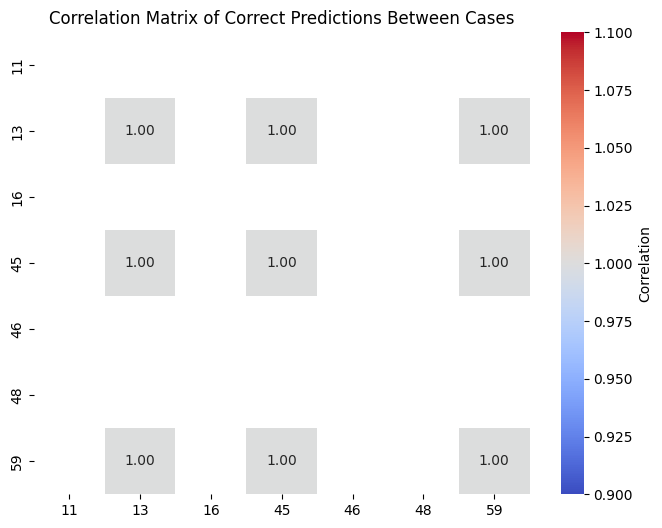


Case numbers to original titles:
Case 11: 送仙居令
Case 13: 送潘華陽
Case 16: 題仙居閣
Case 45: 張以道見過
Case 46: 彭山縣君居
Case 48: 懷石壁山寺
Case 59: 毛虞卿見過


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

model_columns = combined_true_preds.columns[2:-1]

most_correct_tags_df = cases_with_most_correct_tags[model_columns]

# Create a binary matrix for correct predictions
def create_binary_matrix(row):
    return [1 if row['correct answer'] == row[model] or
     (row['correct answer'] == ' ' and row[model] == ' ')
     else 0 for model in model_columns]

binary_correct_matrix = cases_with_most_correct_tags.apply(create_binary_matrix, axis=1)
binary_correct_df = pd.DataFrame(binary_correct_matrix.tolist(), index=cases_with_most_correct_tags.index)

# Transpose the binary matrix to get cases as columns
transposed_binary_df = binary_correct_df.T
case_correlation_matrix = transposed_binary_df.corr()

# Visualize the correlation matrix by using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(case_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix of Correct Predictions Between Cases")
plt.show()

case_index_to_name = {index: row['original titles'] for index, row in cases_with_most_correct_tags.iterrows()}

# print to see the result
print("\nCase numbers to original titles:")
for case_index, case_name in case_index_to_name.items():
    print(f"Case {case_index}: {case_name}")


In [57]:
from collections import defaultdict
from collections import Counter
import numpy as np

# Identify pairs of cases within the high correlation
correlation_threshold = 0
high_correlation_case_pairs = []

for i in range(len(case_correlation_matrix)):
    for j in range(i + 1, len(case_correlation_matrix)):
        if case_correlation_matrix.iloc[i, j] > correlation_threshold:
            # Ensure that the smaller index is always in 'Case 1'
            if case_correlation_matrix.index[i] < case_correlation_matrix.columns[j]:
                high_correlation_case_pairs.append((
                    case_correlation_matrix.index[i],
                    case_correlation_matrix.columns[j],
                    case_correlation_matrix.iloc[i, j]
                ))
            else:
                high_correlation_case_pairs.append((
                    case_correlation_matrix.columns[j],
                    case_correlation_matrix.index[i],
                    case_correlation_matrix.iloc[i, j]
                ))


high_corr_df = pd.DataFrame(high_correlation_case_pairs, columns=['Case 1', 'Case 2', 'Correlation'])
high_corr_df['Correlation'] = high_corr_df['Correlation'].round(3)

case_index_to_titles = cases_with_most_correct_tags_sorted.set_index(cases_with_most_correct_tags_sorted.index)['original titles']

high_corr_df['Case 1 Title'] = high_corr_df['Case 1'].map(case_index_to_titles)
high_corr_df['Case 2 Title'] = high_corr_df['Case 2'].map(case_index_to_titles)

# Group the high correlation DataFrame by case numbers
grouped_high_corr_df = high_corr_df.groupby('Case 1').apply(lambda x: x.sort_values(by='Correlation', ascending=False)).reset_index(drop=True)

# print to see
print("\nDetailed high correlation pairs:")
grouped_high_corr_df[['Case 1', 'Case 1 Title', 'Case 2', 'Case 2 Title', 'Correlation']]


Detailed high correlation pairs:


,Case 1,Case 1 Title,Case 2,Case 2 Title,Correlation
0,13,送潘華陽,45,張以道見過,1.0
1,13,送潘華陽,59,毛虞卿見過,1.0
2,45,張以道見過,59,毛虞卿見過,1.0


Speaking of correlations between two cases, it seems that among top correctly tagged cases, three cases have correlations between each other, which are `送潘華陽`, `張以道見過`, and `毛虞卿見過`.

### Correlation for least correct tagged cases

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


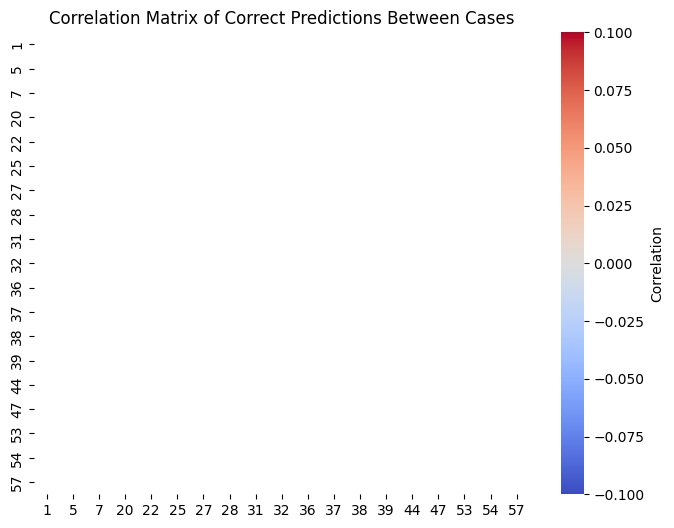


Case numbers to original titles:
Case 1: 別宇文丈
Case 5: 有懷安國
Case 7: 見放翁退
Case 20: 别宇文季蒙
Case 22: 呈水心先生
Case 25: 和君時見寄
Case 27: 和子召見寄
Case 28: 和子華見寄
Case 31: 和平叔見寄
Case 32: 和東美見寄
Case 36: 寄太和舊遊
Case 37: 寄宇文公南
Case 38: 寄宇文成州
Case 39: 寄歐陽元老
Case 44: 弔宇文道可
Case 47: 彭山贈貫之
Case 53: 次及甫見寄
Case 54: 次惠老見詒
Case 57: 次馬初心韻


In [59]:
model_columns = combined_true_preds.columns[2:-1]
least_correct_tags_df = cases_with_no_correct_tags[model_columns]

# Create a binary matrix for correct predictions
def create_binary_matrix(row):
    return [1 if row['correct answer'] == row[model] or
     (row['correct answer'] == ' ' and row[model] == ' ')
     else 0 for model in model_columns]

binary_correct_matrix = cases_with_no_correct_tags.apply(create_binary_matrix, axis=1)
binary_correct_df = pd.DataFrame(binary_correct_matrix.tolist(), index=cases_with_no_correct_tags.index)

transposed_binary_df = binary_correct_df.T
case_correlation_matrix = transposed_binary_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(case_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix of Correct Predictions Between Cases")
plt.show()

case_index_to_name = {index: row['original titles'] for index, row in cases_with_no_correct_tags.iterrows()}

# print
print("\nCase numbers to original titles:")
for case_index, case_name in case_index_to_name.items():
    print(f"Case {case_index}: {case_name}")


### Correlation for mid-correct cases

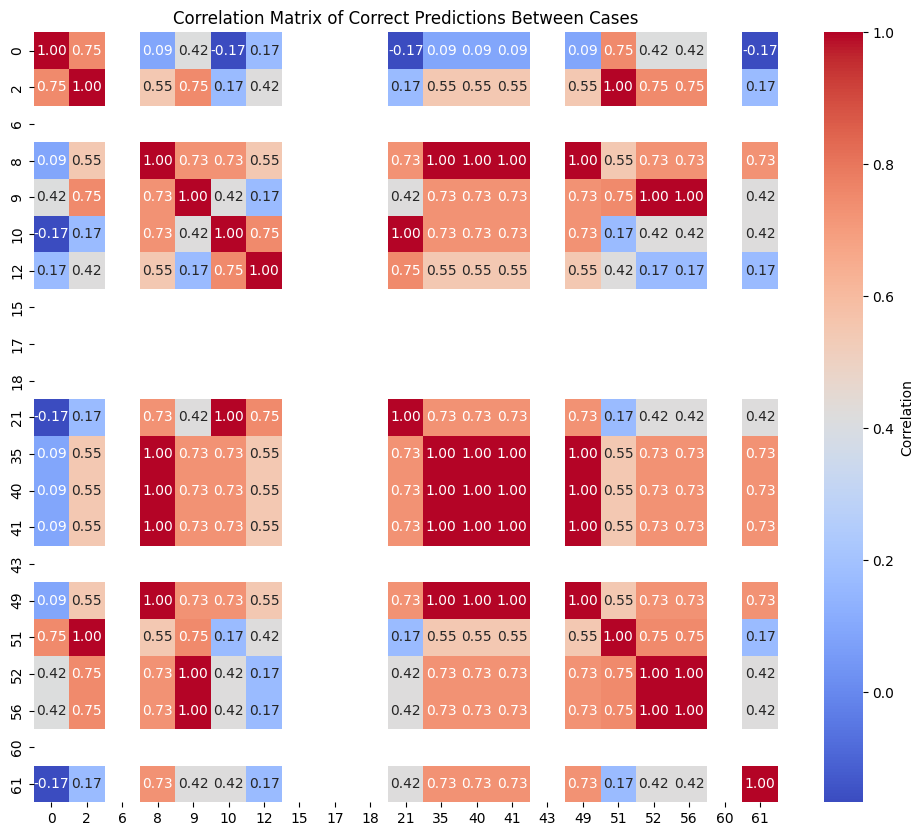


Case numbers to original titles:
Case 0: 伯和見過
Case 2: 君章見過
Case 6: 襄陽懷古
Case 8: 見蔡儒效
Case 9: 見袁蒙齋
Case 10: 送丁惠安
Case 12: 送歐陽辯
Case 15: 錢塘懷古
Case 17: 題昌國院
Case 18: 仁壽堂古梅
Case 21: 呈歐陽伯威
Case 35: 和耿憲見贈
Case 40: 寄歐陽叔弼
Case 41: 寄歐陽振仲
Case 43: 寄華陽道侶
Case 49: 挽歐陽仁叟
Case 51: 挽歐陽幼立
Case 52: 挽歐陽梅坡
Case 56: 次韻謝昌國
Case 60: 水心亭分題
Case 61: 獻歐陽永叔


In [60]:
# Identify cases with average correct tags
cases_with_mid_correct_tags = combined_true_preds[(combined_true_preds['correct counts'] <= 5) & (combined_true_preds['correct counts'] >= 3)]

model_columns = combined_true_preds.columns[2:-1]
mid_correct_tags_df = cases_with_mid_correct_tags[model_columns]

# Create a binary matrix for correct predictions within the filtered cases
def create_binary_matrix(row):
    return [1 if row['correct answer'] == row[model] or
     (row['correct answer'] == ' ' and row[model] == ' ')
     else 0 for model in model_columns]

binary_correct_matrix = cases_with_mid_correct_tags.apply(create_binary_matrix, axis=1)
binary_correct_df = pd.DataFrame(binary_correct_matrix.tolist(), index=cases_with_mid_correct_tags.index)

# Transpose the binary matrix to get cases as columns
transposed_binary_df = binary_correct_df.T

# Calculate the correlation matrix
case_correlation_matrix = transposed_binary_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(case_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix of Correct Predictions Between Cases")
plt.show()

case_index_to_name = {index: row['original titles'] for index, row in cases_with_mid_correct_tags.iterrows()}

# print
print("\nCase numbers to original titles:")
for case_index, case_name in case_index_to_name.items():
    print(f"Case {case_index}: {case_name}")


In [61]:
# Identify pairs of cases with high correlation
correlation_threshold = 0.7
mid_correlation_case_pairs = []

for i in range(len(case_correlation_matrix)):
    for j in range(i + 1, len(case_correlation_matrix)):
        if case_correlation_matrix.iloc[i, j] > correlation_threshold:
            if case_correlation_matrix.index[i] < case_correlation_matrix.columns[j]:
                mid_correlation_case_pairs.append((
                    case_correlation_matrix.index[i],
                    case_correlation_matrix.columns[j],
                    case_correlation_matrix.iloc[i, j]
                ))
            else:
                mid_correlation_case_pairs.append((
                    case_correlation_matrix.columns[j],
                    case_correlation_matrix.index[i],
                    case_correlation_matrix.iloc[i, j]
                ))

# Create a dataframe to display the mid correlated pairs of cases
mid_corr_df = pd.DataFrame(mid_correlation_case_pairs, columns=['Case 1', 'Case 2', 'Correlation'])
mid_corr_df['Correlation'] = mid_corr_df['Correlation'].round(3)

case_index_to_titles = cases_with_mid_correct_tags.set_index(cases_with_mid_correct_tags.index)['original titles']

mid_corr_df['Case 1 Title'] = mid_corr_df['Case 1'].map(case_index_to_titles)
mid_corr_df['Case 2 Title'] = mid_corr_df['Case 2'].map(case_index_to_titles)

# Group the mid correlation DataFrame by case numbers
grouped_mid_corr_df = mid_corr_df.groupby('Case 1').apply(lambda x: x.sort_values(by='Correlation', ascending=False)).reset_index(drop=True)

# print the datafrmae
print("\nDetailed mid correlation pairs:")
grouped_mid_corr_df[['Case 1', 'Case 1 Title', 'Case 2', 'Case 2 Title', 'Correlation']]



Detailed mid correlation pairs:


,Case 1,Case 1 Title,Case 2,Case 2 Title,Correlation
0,0,伯和見過,2,君章見過,0.75
1,0,伯和見過,51,挽歐陽幼立,0.75
2,2,君章見過,51,挽歐陽幼立,1.00
3,2,君章見過,9,見袁蒙齋,0.75
4,2,君章見過,52,挽歐陽梅坡,0.75
5,2,君章見過,56,次韻謝昌國,0.75
6,8,見蔡儒效,35,和耿憲見贈,1.00
7,8,見蔡儒效,40,寄歐陽叔弼,1.00
8,8,見蔡儒效,41,寄歐陽振仲,1.00
9,8,見蔡儒效,49,挽歐陽仁叟,1.00


In [62]:
print(f"Number of cases with mid correctly tagged cases: {len(cases_with_mid_correct_tags)}")

# Count correlations below and above/equal to 0.8 as a threshold (since there are only two correlation values, 0.73 and 1)
midlow_corr_count = grouped_mid_corr_df[grouped_mid_corr_df['Correlation'] < 0.8]['Correlation'].count()
midhigh_corr_count = grouped_mid_corr_df[grouped_mid_corr_df['Correlation'] >= 0.8]['Correlation'].count()

print("\nCounts of correlation values:")
print(f"Correlations=0.73: {midlow_corr_count}")
print(f"Correlations=1: {midhigh_corr_count}")

# Filter for pairs with correlation exactly 1
perfect_correlation_pairs = grouped_mid_corr_df[grouped_mid_corr_df['Correlation'] == 1]

print("\nMid-correlated pairs with correlation = 1:")
print(perfect_correlation_pairs[['Case 1 Title', 'Case 2 Title', 'Correlation']])




Number of cases with mid correctly tagged cases: 21

Counts of correlation values:
Correlations=0.73: 40
Correlations=1: 15

Mid-correlated pairs with correlation = 1:
   Case 1 Title Case 2 Title  Correlation
2          君章見過        挽歐陽幼立          1.0
6          見蔡儒效        和耿憲見贈          1.0
7          見蔡儒效        寄歐陽叔弼          1.0
8          見蔡儒效        寄歐陽振仲          1.0
9          見蔡儒效        挽歐陽仁叟          1.0
16         見袁蒙齋        挽歐陽梅坡          1.0
17         見袁蒙齋        次韻謝昌國          1.0
23         送丁惠安        呈歐陽伯威          1.0
34        和耿憲見贈        寄歐陽叔弼          1.0
35        和耿憲見贈        寄歐陽振仲          1.0
36        和耿憲見贈        挽歐陽仁叟          1.0
40        寄歐陽叔弼        寄歐陽振仲          1.0
41        寄歐陽叔弼        挽歐陽仁叟          1.0
45        寄歐陽振仲        挽歐陽仁叟          1.0
54        挽歐陽梅坡        次韻謝昌國          1.0


For the mid correctly tagged cases, I was interested in the correlations for counts of correct tags bigger than 2 and smaller than 6 (`3 <= x <= 5`). According to the results, there are 21 mid correctly tagged cases, with 15 pairs have strong correlations between each other. Some exmaples include: `見蔡儒效` and `寄歐陽叔弼`, `送丁惠安` and `呈歐陽伯威`, `寄歐陽叔弼` and `寄歐陽振仲`. Cases that has last name as `歐陽` tend to receive high correlations with other cases, within the realm of mid correctly tagged cases.

## Similarity between models

To calculate the similarity between 7 different models, i would use  Jaccard Similarity to compare the similarity of recognized tags between each pair of models.

In [63]:
# first need to create a binary matrix (1 indicates a correct prediction and 0 indicates an incorrect prediction)
binary_matrix = combined_true_preds.apply(lambda row: [
    1 if row['correct answer'] == row[model] or (row['correct answer'] == ' ' and row[model] == '') else 0
    for model in ['shibing624_recog', 'uer_recog', 'ckiplab_recog', '51la5_recog', 'KoichiYasuoka_recog', 'jplu_recog', 'stanfordnlp_recog']
], axis=1).tolist()

# Convert the binary matrix to a NumPy array
binary_array = np.array(binary_matrix)


# then calculate the Jaccard similarity matrix
from sklearn.metrics import jaccard_score

num_models = binary_array.shape[1]
jaccard_similarity_matrix = np.zeros((num_models, num_models))

for i in range(num_models):
    for j in range(i, num_models):
        jaccard_similarity_matrix[i, j] = jaccard_score(binary_array[:, i], binary_array[:, j])
        jaccard_similarity_matrix[j, i] = jaccard_similarity_matrix[i, j]

# Create a dataframe to see the result
model_names = ['shibing624', 'uer', 'ckiplab', '51la5', 'KoichiYasuoka', 'jplu', 'stanfordnlp']
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_matrix, index=model_names, columns=model_names)

print("\nJaccard Similarity Matrix between Models:")
display(jaccard_similarity_df.round(3))


Jaccard Similarity Matrix between Models:


,shibing624,uer,ckiplab,51la5,KoichiYasuoka,jplu,stanfordnlp
shibing624,1.000,0.528,0.538,0.595,0.526,0.286,0.250
uer,0.528,1.000,0.633,0.655,0.382,0.545,0.360
ckiplab,0.538,0.633,1.000,0.656,0.405,0.345,0.258
51la5,0.595,0.655,0.656,1.000,0.457,0.462,0.357
KoichiYasuoka,0.526,0.382,0.405,0.457,1.000,0.121,0.057
jplu,0.286,0.545,0.345,0.462,0.121,1.000,0.500
stanfordnlp,0.250,0.360,0.258,0.357,0.057,0.500,1.000


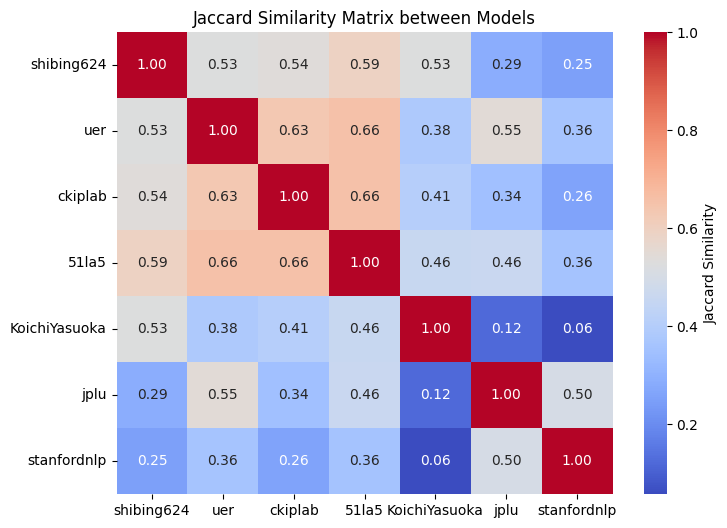

In [64]:
# see the similarity matrix by using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(jaccard_similarity_df, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Jaccard Similarity'})
plt.title("Jaccard Similarity Matrix between Models")
plt.show()

In [65]:
# Create a list to store the similarity scores and model pairs
similarity_scores = []

# Iterate over the upper triangle of the similarity matrix (excluding the diagonal!!!)
for i in range(num_models):
    for j in range(i + 1, num_models):
        similarity_scores.append({
            'Model 1': model_names[i],
            'Model 2': model_names[j],
            'Jaccard Similarity': jaccard_similarity_matrix[i, j]
        })

# create a new dataframe to show the similarity and comparisons
similarity_df = pd.DataFrame(similarity_scores)
similarity_df_sorted = similarity_df.sort_values(by='Jaccard Similarity', ascending=False)

print("\nSorted Jaccard Similarity Scores:")
display(similarity_df_sorted.round(3))

# Print the best, second best, and third best pairs
best_pair = similarity_df_sorted.iloc[0]
second_best_pair = similarity_df_sorted.iloc[1]
third_best_pair = similarity_df_sorted.iloc[2]

print("\nBest Pair:")
print(f"Models: {best_pair['Model 1']} and {best_pair['Model 2']}")
print(f"Jaccard Similarity: {best_pair['Jaccard Similarity']:.3f}")

print("\nSecond Best Pair:")
print(f"Models: {second_best_pair['Model 1']} and {second_best_pair['Model 2']}")
print(f"Jaccard Similarity: {second_best_pair['Jaccard Similarity']:.3f}")

print("\nThird Best Pair:")
print(f"Models: {third_best_pair['Model 1']} and {third_best_pair['Model 2']}")
print(f"Jaccard Similarity: {third_best_pair['Jaccard Similarity']:.3f}")



Sorted Jaccard Similarity Scores:


,Model 1,Model 2,Jaccard Similarity
11,ckiplab,51la5,0.656
7,uer,51la5,0.655
6,uer,ckiplab,0.633
2,shibing624,51la5,0.595
9,uer,jplu,0.545
1,shibing624,ckiplab,0.538
0,shibing624,uer,0.528
3,shibing624,KoichiYasuoka,0.526
20,jplu,stanfordnlp,0.500
16,51la5,jplu,0.462



Best Pair:
Models: ckiplab and 51la5
Jaccard Similarity: 0.656

Second Best Pair:
Models: uer and 51la5
Jaccard Similarity: 0.655

Third Best Pair:
Models: uer and ckiplab
Jaccard Similarity: 0.633


According to the results, it can be concluded that `ckiplab`, `51la5`, and `uer` are the top three models that are more similar to each other. In other words, they seem to identify and tag the cases in similar ways. They have the Jaccard Similarity score around `0.65`, which is a mid strong score.  

---
## Conclusion

**Which model is the best?**

`shibing624/` is the model with the highest accuracy score, 53.226% and the highest correct counts of 33. The next accurate model is `ckiplab/`, which has correct counts of 27.

In general, `shibing624/` is the best model. `ckiplab/`, `51la5/`, and `KoichiYasuoka/` show similar performance to identify the correct tags, which are 27, 26, and 25 sequentially.


**Which two models are more similar between each other?**

`ckiplab`, `51la5`, and `uer` are the top three models that are more similar to each other. In other words, they seem to identify and tag the cases in similar ways. They have the Jaccard Similarity score around `0.65`, which is a mid strong score.  


Therefore, comprehensively speaking, `ckiplab/` and `51la5/` seem to be two models that have similar performance (Jaccard Similarity = 0.656) and accuracy scores (43.5 and 41.9).

**Which cases received correct tags?**

According to the code above, there are 7 cases received most correct recognizations. `送仙居令` received correct tags from all models. There fore 6 cases received correct tags from 6 models, which are`送潘華陽`, `張以道見過`, `毛虞卿見過`, `彭山縣君居`, `懷石壁山寺`, `題仙居閣`.

However, there are 19 cases in total received No correct tags. Cases such as `和東美見寄`, `和子華見寄`, `寄太和舊遊`, `見放翁退`, `次惠老見詒`, `呈水心先生`, and `彭山贈貫之` received ZERO correct tags.

From observation, it seems like cases received correct tags tend to have popular last name, such as `潘` and `張`. In addition, they have obvious characters that refer to locations like `仙居` and `彭山`, which are definitely not people's name.

While cases received no correct tags tend to have name that can be easily mixed with location, such as `水心`. They also can't recognize abnormal names such as 放翁. Moreover, models are often confused by first character of titles and the name after that. For example, the correct answer of `和子華見寄` is `子華`, whereas many models recognized the person's name as `和子華`. The ambiguity between these factors might contribute the unsuccessful model performance.

**Which cases have stronger correlation between each other?**

Speaking of correlations between two cases, it seems that among top correctly tagged cases, three cases have correlations between each other, which are `送潘華陽`, `張以道見過`, and `毛虞卿見過`. There are No correlations shown for the incorrect tagged cases.

For the mid correctly tagged cases, I was interested in the correlations for counts of correct tags bigger than 2 and smaller than 6 (`3 <= x <= 5`). According to the results, there are 21 mid correctly tagged cases, with 15 pairs have strong correlations between each other. Some exmaples include: `見蔡儒效` and `寄歐陽叔弼`, `送丁惠安` and `呈歐陽伯威`, `寄歐陽叔弼` and `寄歐陽振仲`. Cases that has last name as `歐陽` tend to receive high correlations with other cases, within the realm of mid correctly tagged cases.